# Activity: Build a Naive Bayes model 

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more. 

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [1]:
# Import relevant libraries and modules.

import pandas as pd
import numpy as np

from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [3]:
# Display the first 10 rows of data.
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [4]:
# Define the y (target) variable.
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.
X = extracted_data.copy()
X = X.drop(columns=['target_5yrs'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into X and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, subset your DataFrame by using square brackets `[]` to specify which column(s) to select.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [5]:
# Display the first 10 rows of your target data.

y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

**Question:** What do you observe about the your target variable?


They are 0s and 1s.  0 means that the player's career was less than 5 years.  1 means that the player's career was 5 or more years.

In [6]:
# Display the first 10 rows of your predictor variables.

X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,0.435294


**Question:** What do you observe about the your predictor variables?

All predictor variables are continuous values.

Since we're going to use Naive Bayes algorithm, there is no need to scale the variables even though there a huge difference between `total_points` and `efficiency`.

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [7]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the function in the `model_selection` module of `sklearn` on the features and target variable, in order to perform the splitting.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `model_selection.train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`.

Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

### Print the shape of each output 

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [8]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.
print('X_train:', X_train.shape)

# Print the shape of X_test.
print('X_test:', X_test.shape)

# Print the shape of y_train.
print('y_train:', y_train.shape)

# Print the shape of y_test.
print('y_test:', y_test.shape)

X_train: (1005, 10)
X_test: (335, 10)
y_train: (1005,)
y_test: (335,)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Call the attribute that DataFrames in `pandas` have to get the number of rows and number of columns as a tuple.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `shape` attribute.
</details>

**Question:** How many rows are in each of the outputs?


1004 rows in each training set and 335 rows in each testing set.

**Question:** What was the effect of the train-test split?


To split the data and later use the testing set to evaluate results (predicted vs. real).

75% are in train and 25% are in test.

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

We assume that the features are normally distributed and continuous. Since they're normally distributed, Gaussian NB would be the most appropriate to use.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about different implementations of the Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/supplement/1zfDy/naive-bayes-classifiers) to determine which is appropriate in this situation.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that you are performing binary classification.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You can identify the appropriate algorithm to use because you are performing a binary classification and assuming that the features of your model follow a normal distribution.
</details>

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [9]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
nb = naive_bayes.GaussianNB()

# Fit the model on your training data.
nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".
y_pred = nb.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The appropriate implementation in this case is `naive_bayes`.`GaussianNB()`. Fit this model to your training data and predict on your test data.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `fit()`and pass your training feature set and target variable. Then call `predict()` on your test feature set.
</details>

## Step 4: Results and evaluation


### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [10]:
# Print your accuracy score.
print('Accuracy:', '%.3f' % metrics.accuracy_score(y_test, y_pred))

# Print your precision score.
print('Precision:', '%.3f' % metrics.precision_score(y_test, y_pred))

# Print your recall score.
print('Recall:', '%.3f' % metrics.recall_score(y_test, y_pred))

# Print your f1 score.
print('F1 Score:', '%.3f' % metrics.f1_score(y_test, y_pred))

Accuracy: 0.690
Precision: 0.841
Recall: 0.586
F1 Score: 0.690


In [11]:
# classification_report also shows the same results as above

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, nb.classes_))

              precision    recall  f1-score   support

           0       0.58      0.84      0.69       137
           1       0.84      0.59      0.69       198

    accuracy                           0.69       335
   macro avg       0.71      0.71      0.69       335
weighted avg       0.74      0.69      0.69       335



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/EITmV/key-evaluation-metrics-for-classification-models) for detail on these metrics.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `metrics` module in `sklearn` has a function for computing each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test`, and `y_pred` into each function.
</details>

**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?



The accuracy score is 0.69, in other words, 69% accurate.

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?


No, because there was a slight imbalance in the target class distribution so accuracy is bias towards the majority. An imbalanced model could be bad at balancing false positives and false negatives.

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?


Precision is 0.84 and recall is 0.59.

The precision score is 0.84, which means the model predicted true positives that were positive. When the model predicts that a player has played 5 or more years, it is correct 84% of the time. 

The recall score is 0.59, which means the model correctly identified a positive from all positives. The model found 59% of players who played 5 or more years out of all players who played 5 or more years.

These two metrics combined can give a better assessment of model performance than accuracy does alone because there is class imbalance in our outcome variable.

**Question:** What is the F1 score of your model, and what does this score mean?

F1 score is a measurement that combines both precision and recall into a single expression, giving each equal importance. The F1 score is 0.69 (69%), which suggests decent predictive power in this model.

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

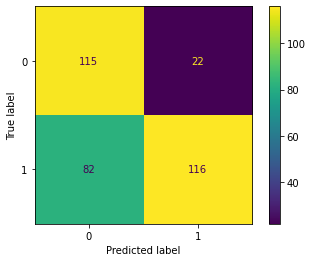

In [12]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
nb_cm = metrics.confusion_matrix(y_test, y_pred, labels=nb.classes_)

# Create the display for your confusion matrix.
nb_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb.classes_)
nb_disp.plot(values_format='') # `values_format=''` suppresses scientific notation

# Plot the visual in-line.
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `metrics` module has functions to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Then, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?


- The top left to bottom right yellow squares in the confusion matrix represents the correct predictions (True Negatives and True Positives). Adding these two and divinging by the sum of every square yields the Accuracy score.

- The Precision score is True Positive / (False Positive + True Positive, 116/(22+116) = 0.84.
    - True Positives is much higher than False Positives, resulting in a high score.

- The Recall score is True Positive / (False Negative + True Positive), 116/(82+116) = 0.59.
    - True Negatives and False Negatives are closer in number, which is why the Recall score is lower.

## Considerations

**What are some key takeaways that you learned from this lab?**
- Being able to explain model metrics is important.
- The metrics showed how strong a model is.
- Accuracy shouldn't be the only metric used. We should include Precision, Recall and F1.

**How would you present your results to your team?**
- The Gaussian Naive Bayes model yielded the following results:
    - Precision: 0.84
    - Recall: 0.59
    - Accuracy: 0.69
    - F1: 0.69
- Used feature engineering to create two new variables:
    - total points (points per game * games played)
    - efficiency (total points / points per game * games played)
- Since Naive Bayes involves an assumption that features are independent of each other given the class, we removed the features listed in the 2 bullet points above.

**How would you summarize your findings to stakeholders?**
- The model predicts that a player has played 5 or more years, it is correct 84% of the time.
- The model found 59% of players who played 5 or more years out of all players who played 5 or more years.
- The model performed really well when it tries to predict if a player has played 5 or more years.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged